## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [196]:
# Nothing to do here

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [198]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt 

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [200]:
# How many distinct colors are available?
num_colors = colors["name"].value_counts().count()
num_colors

135

In [201]:

colors["name"].value_counts()

Dark Bluish Gray                1
Metal Blue                      1
Dark Pink                       1
Chrome Blue                     1
Violet                          1
Chrome Green                    1
Flat Dark Gold                  1
Olive Green                     1
Trans-Dark Pink                 1
Dark Flesh                      1
Chrome Antique Brass            1
Trans-Purple                    1
Very Light Orange               1
Medium Green                    1
Light Pink                      1
Dark Green                      1
Light Turquoise                 1
Dark Azure                      1
Trans-Pink                      1
Sand Green                      1
Pearl Dark Gray                 1
Trans-Neon Orange               1
Speckle Black-Gold              1
Pink                            1
Salmon                          1
Milky White                     1
Dark Purple                     1
Blue-Violet                     1
Dark Tan                        1
Bright Light B

## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [203]:
# colors_summary: Distribution of colors based on transparency
# colors["is_trans"].value_counts(normalize=True)
# colors["is_trans"].value_counts()
# %%sql postgresql:///countries
# SELECT * FROM countries LIMIT 3;

In [204]:
colors_summary = colors.groupby('is_trans').count()
colors_summary 

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

In [206]:
%matplotlib inline
# Read sets data as `sets`

path = 'datasets/sets.csv'
sets = pd.read_csv(path)
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [207]:
# Create a summary of average number of parts by year: `parts_by_year`

parts_by_year = sets.groupby('year')['num_parts'].mean()
parts_by_year


year
1950     10.142857
1953     16.500000
1954     12.357143
1955     36.857143
1956     18.500000
1957     42.619048
1958     44.452381
1959     16.250000
1960    175.333333
1961     70.588235
1962     81.750000
1963     33.333333
1964     82.636364
1965    107.100000
1966     40.651685
1967     98.666667
1968    127.200000
1969     64.594203
1970     84.793103
1971     67.022222
1972    102.842105
1973    103.367647
1974    116.769231
1975    155.225806
1976    153.029412
1977     91.500000
1978    146.616438
1979    105.414634
1980    126.636364
1981     97.835443
1982     69.381579
1983    116.105263
1984     95.039474
1985    122.057554
1986    114.024390
1987     70.000000
1988    144.250000
1989    102.061404
1990    202.035294
1991    166.424528
1992    119.617391
1993    148.432432
1994    127.640625
1995    179.039062
1996    201.770833
1997    129.221649
1998    141.126154
1999    105.543333
2000    104.376147
2001    104.365782
2002    115.700224
2003    159.681928
2004   

In [208]:
parts_by_year = sets.loc[:, ['year', 'num_parts']].groupby('year', as_index=False).mean()
parts_by_year

#as_index = False - keeps index from being changed to year. 

,year,num_parts
0,1950,10.142857
1,1953,16.500000
2,1954,12.357143
3,1955,36.857143
4,1956,18.500000
5,1957,42.619048
6,1958,44.452381
7,1959,16.250000
8,1960,175.333333
9,1961,70.588235


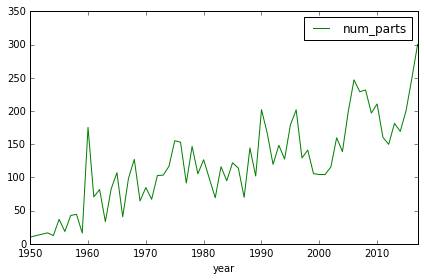

In [209]:
# Plot trends in average number of parts by year

parts_by_year.plot(x='year', y='num_parts', color='green');


## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [211]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [212]:
# themes_by_year: Number of themes shipped by year
themes_by_year = pd.DataFrame(sets.loc[:, ['year', 'theme_id']].groupby('year', as_index=False).count())
themes_by_year.head()

,year,theme_id
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12


## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>

In [214]:
# Nothing to do here